In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_controller_csv(path, label):

    df = pd.read_csv(path)

    # Convert temperatures (stored with -273 offset)
    df["T_zone_C"] = df["obs_0"] - 273.15
    df["t_out_C"] = df["obs_1"] - 273.15

    # Extract scalar action from "[value]"
    df["action_scalar"] = (
        df["action"]
        .astype(str)
        .str.replace("[", "", regex=False)
        .str.replace("]", "", regex=False)
        .astype(float)
    )

    
    # Time index
    df["time"] = np.arange(len(df))

    # Controller label
    df["controller"] = label

    return df


def plot_indoor_temperature(dfs, comfort_low=21, comfort_high=24):
    plt.figure(figsize=(10, 4))

    for df in dfs:
        label = df["controller"].iloc[0]
        plt.plot(df["time"], df["T_zone_C"], label=label)

    plt.axhline(comfort_low, linestyle="--")
    plt.axhline(comfort_high, linestyle="--")

    plt.xlabel("Time step")
    plt.ylabel("Indoor temperature [°C]")
    plt.title("Indoor Temperature Comparison")
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_external_temperature(dfs):
    plt.figure(figsize=(10, 4))

    for df in dfs:
        label = df["controller"].iloc[0]
        plt.plot(df["time"], df["t_out_C"], label=label)

    plt.xlabel("Time step")
    plt.ylabel("Outdoor temperature [°C]")
    plt.title("Outdoor Temperature Comparison")
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_actions(dfs):
    plt.figure(figsize=(10, 4))

    for df in dfs:
        label = df["controller"].iloc[0]
        plt.plot(df["time"], df["action_scalar"], label=label)

    plt.xlabel("Time step")
    plt.ylabel("Action")
    plt.title("Control Action Comparison")
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_reward(dfs):
    plt.figure(figsize=(10, 4))

    for df in dfs:
        label = df["controller"].iloc[0]
        plt.plot(df["time"], df["reward"], label=label)

    plt.xlabel("Time step")
    plt.ylabel("Reward")
    plt.title("Training Reward")
    plt.legend()
    plt.tight_layout()
    plt.show()



def denormalize(df, bounds):
    """
    De-normalization of DataFrame columns from [-1, 1].

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with normalized columns
    bounds : dict
        {column_name: (min, max)} in original physical units
    """
    for col, (x_min, x_max) in bounds.items():
        df[col] = 0.5 * (df[col] + 1.0) * (x_max - x_min) + x_min

In [3]:
df = pd.read_csv("DQN_Buffer_27_50_training.csv")

bounds = {
    "obs_0": (273,324),
    "obs_1": (260, 303),
    "obs_2": (0, 862),
}

denormalize(
    df,
    bounds=bounds
)

df.to_csv("DQN_Buffer_27_50_training.csv", index=False)

In [4]:
dfs = [
    load_controller_csv("DQN_Buffer_27_50_training.csv", "DQN_27_training"),
    #load_controller_csv("DQN_Buffer_50_training_normalized.csv", "DQN_training"),
]


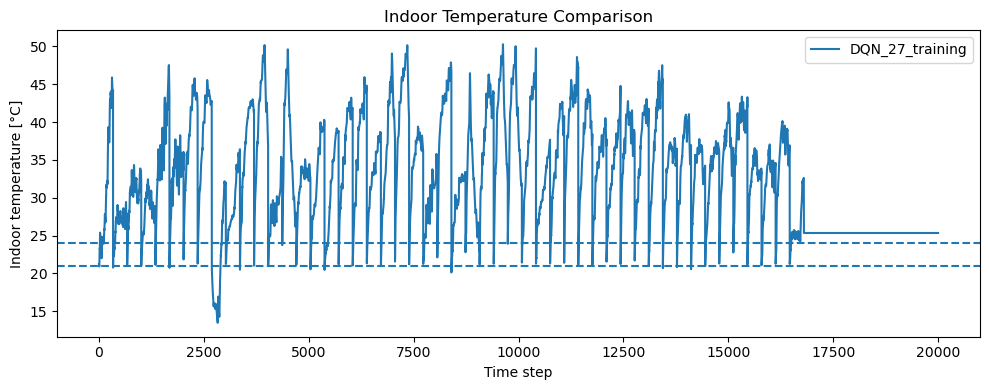

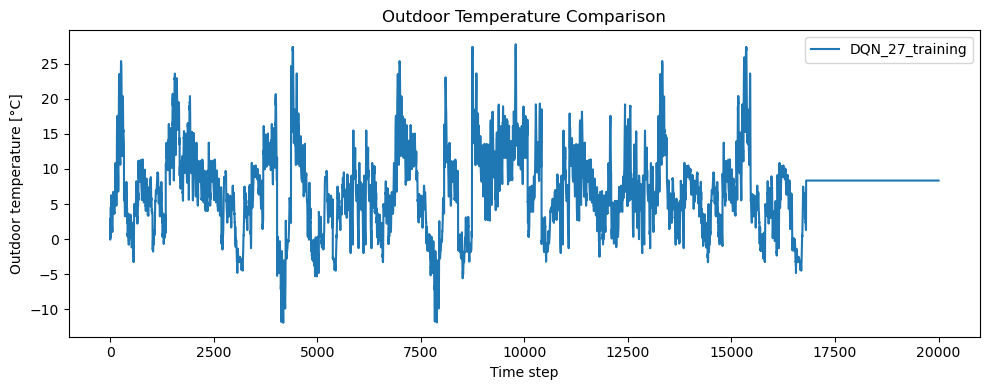

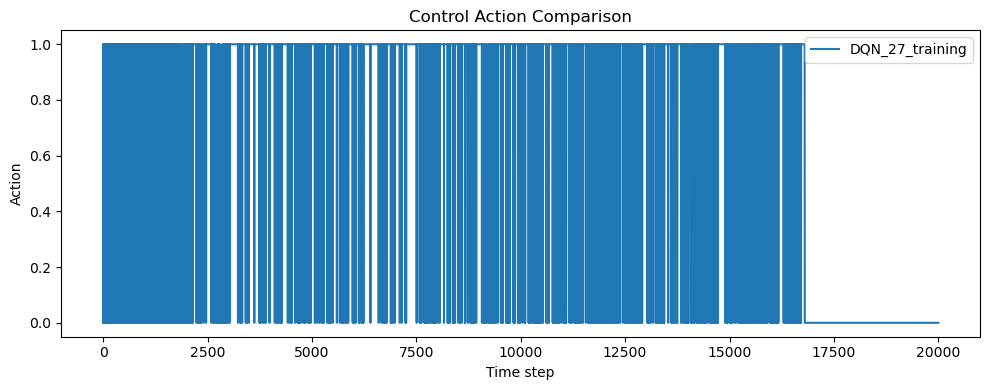

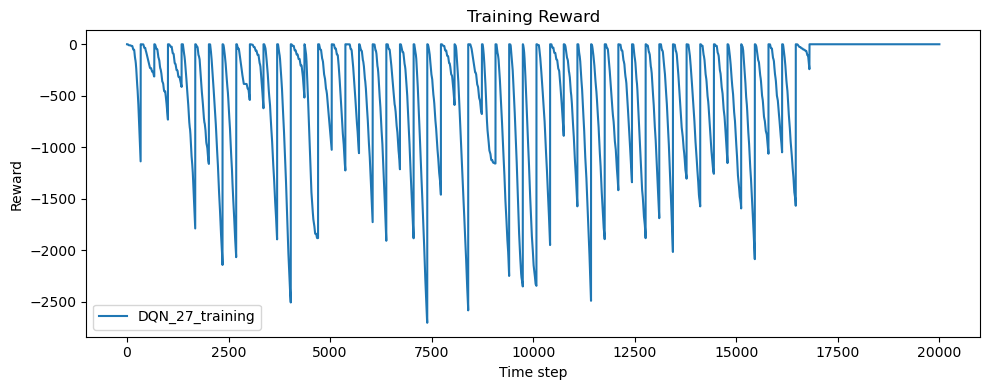

In [5]:
plot_indoor_temperature(dfs)
plot_external_temperature(dfs)
plot_actions(dfs)
plot_reward(dfs)